# Problem Statement


In [2]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
df= pd.read_csv('gas_turbines (2).csv')
df.head(6)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409


In [4]:
df.isna().sum()


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     1
TEY     1
CDP     1
CO      1
NOX     1
dtype: int64

In [5]:
df['TEY'].nunique()


2835

In [7]:
df.shape



(7994, 11)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7994 entries, 0 to 7993
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7994 non-null   float64
 1   AP      7994 non-null   float64
 2   AH      7994 non-null   float64
 3   AFDP    7994 non-null   float64
 4   GTEP    7994 non-null   float64
 5   TIT     7994 non-null   float64
 6   TAT     7993 non-null   float64
 7   TEY     7993 non-null   float64
 8   CDP     7993 non-null   float64
 9   CO      7993 non-null   float64
 10  NOX     7993 non-null   float64
dtypes: float64(11)
memory usage: 687.1 KB


In [9]:
df.describe()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,17.980815,1012.545683,79.486168,4.303552,25.323762,1083.318051,545.928609,133.365236,12.043145,2.280642,68.943671
std,7.741129,6.460328,13.979032,0.821729,4.082675,16.659652,7.687581,15.569893,1.071061,2.445822,10.170514
min,0.522300,985.850000,30.344000,2.087400,18.100000,1024.600000,513.060000,101.150000,9.928600,0.000388,41.777000
25%,11.303500,1008.500000,69.904000,3.850175,23.336250,1078.825000,546.290000,127.630000,11.605000,1.040200,62.676000
50%,18.616500,1012.300000,82.918000,4.298200,25.225000,1089.100000,549.910000,133.770000,12.042000,1.594000,67.353000
75%,24.066250,1016.300000,90.526500,4.702200,26.441000,1094.100000,550.070000,135.140000,12.312000,2.781400,73.859000
max,34.929000,1031.800000,100.200000,7.610600,37.402000,1100.800000,550.530000,174.610000,15.081000,44.103000,119.890000


In [10]:
x=df.columns
x 


Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [11]:
sc= StandardScaler()

df=sc.fit_transform(df)
df

array([[-1.43675562, -0.71915443,  1.23856317, ..., -1.34281321,
         0.35739036,  1.35481749],
       [-1.44636722, -0.64175414,  1.26138449, ..., -1.34934919,
         0.39075547,  1.36012729],
       [-1.43180771, -0.5798339 ,  1.17703861, ..., -1.34654805,
         0.37640357,  1.32984177],
       ...,
       [-1.28241447,  1.64929445,  1.17210234, ...,  1.96719585,
        -0.70939354, -0.41659016],
       [-1.07248364,  1.57189416,  0.56887551, ...,  1.87849321,
        -0.44913752, -0.05591721],
       [-0.97069625,  1.49449387,  0.11967469, ...,         nan,
                nan,         nan]])

In [12]:
df=pd.DataFrame(data=df, columns=x)
df 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.436756,-0.719154,1.238563,-0.977940,-1.386619,-1.447783,0.529639,-1.198878,-1.342813,0.357390,1.354817
1,-1.446367,-0.641754,1.261384,-0.978184,-1.370697,-1.441780,0.529639,-1.197593,-1.349349,0.390755,1.360127
2,-1.431808,-0.579834,1.177039,-0.999360,-1.358205,-1.435777,0.512728,-1.198236,-1.346548,0.376404,1.329842
3,-1.411241,-0.517914,1.127676,-1.001672,-1.355020,-1.423771,0.528339,-1.197593,-1.341879,0.372764,1.349704
4,-1.367201,-0.440513,1.120593,-0.980861,-1.361634,-1.417768,0.527038,-1.197593,-1.336277,0.395703,1.314404
...,...,...,...,...,...,...,...,...,...,...,...
7989,-1.575814,1.711215,0.937451,0.908810,2.152458,0.995398,-2.934606,2.126979,2.138999,-0.843361,-0.877166
7990,-1.491363,1.695735,1.101492,0.919033,2.048353,1.007404,-2.761589,2.073025,2.104452,-0.845508,-0.745601
7991,-1.282414,1.649294,1.172102,0.809379,1.883990,1.001401,-2.420758,1.909238,1.967196,-0.709394,-0.416590
7992,-1.072484,1.571894,0.568876,0.674533,1.697091,0.995398,-2.118954,1.768573,1.878493,-0.449138,-0.055917


In [13]:
x=df.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
y=df['TEY']

In [14]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.436756,-0.719154,1.238563,-0.977940,-1.386619,-1.447783,0.529639,-1.342813,0.357390,1.354817
1,-1.446367,-0.641754,1.261384,-0.978184,-1.370697,-1.441780,0.529639,-1.349349,0.390755,1.360127
2,-1.431808,-0.579834,1.177039,-0.999360,-1.358205,-1.435777,0.512728,-1.346548,0.376404,1.329842
3,-1.411241,-0.517914,1.127676,-1.001672,-1.355020,-1.423771,0.528339,-1.341879,0.372764,1.349704
4,-1.367201,-0.440513,1.120593,-0.980861,-1.361634,-1.417768,0.527038,-1.336277,0.395703,1.314404
...,...,...,...,...,...,...,...,...,...,...
7989,-1.575814,1.711215,0.937451,0.908810,2.152458,0.995398,-2.934606,2.138999,-0.843361,-0.877166
7990,-1.491363,1.695735,1.101492,0.919033,2.048353,1.007404,-2.761589,2.104452,-0.845508,-0.745601
7991,-1.282414,1.649294,1.172102,0.809379,1.883990,1.001401,-2.420758,1.967196,-0.709394,-0.416590
7992,-1.072484,1.571894,0.568876,0.674533,1.697091,0.995398,-2.118954,1.878493,-0.449138,-0.055917


In [15]:
y

0      -1.198878
1      -1.197593
2      -1.198236
3      -1.197593
4      -1.197593
          ...   
7989    2.126979
7990    2.073025
7991    1.909238
7992    1.768573
7993         NaN
Name: TEY, Length: 7994, dtype: float64

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=143)


In [17]:
ytest


1821   -1.520673
3827    0.034990
2926   -1.448093
7920    0.938714
7060    0.050406
          ...   
5842    0.014437
6005    0.037560
2887   -0.035021
1743    0.169875
3342   -0.035021
Name: TEY, Length: 1599, dtype: float64

In [18]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=30, activation='sigmoid'))
ann.add(Dense(units=20, activation='relu'))

#Add output layer
ann.add(Dense(units=1))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='mean_squared_error')

#Fit the data 
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
200/200 [==============================] - 2s 3ms/step - loss: nan - val_loss: nan
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/50
200/200 [==============================] - 0s 2

<AxesSubplot:>

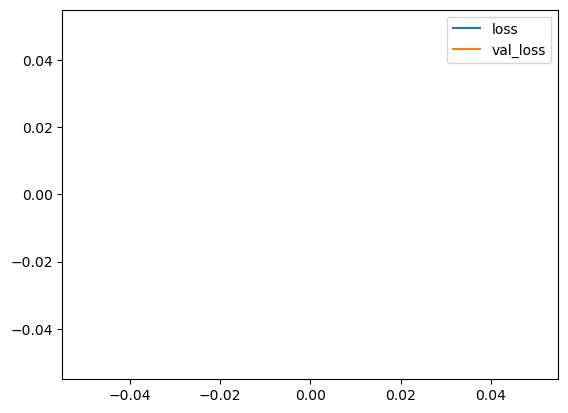

In [19]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [20]:
ypred = ann.predict(xtest)
ypred

50/50 [==============================] - 0s 2ms/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [21]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
ann =Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1, activation='tanh'))

ann.compile(optimizer='adam', loss='mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=45)

Epoch 1/45
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/45
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/45
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/45
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/45
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/45
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/45
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/45
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/45
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/45
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/45
200/200 [==============================] - 0s 2

<AxesSubplot:>

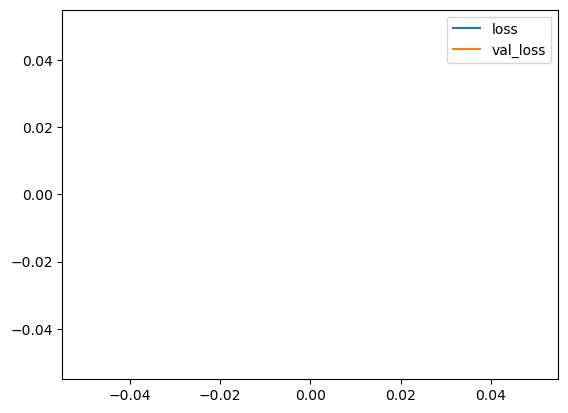

In [23]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

# Early Stopping


In [24]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)


In [25]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam', loss = 'mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=50)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/50
200/200 [==============================] - 0s 2

<AxesSubplot:>

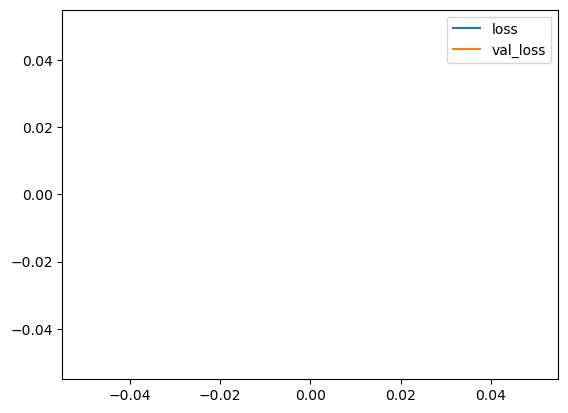

In [26]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

# Drop Out Layer


In [27]:
ann = Sequential()

ann.add(Dense(units=35, activation='relu'))
ann.add(Dropout(rate=0.45))

ann.add(Dense(units=25, activation='relu'))
ann.add(Dropout(rate=0.4))

ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam',loss='mse')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs = 50)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
200/200 [==============================] - 0s 2

<AxesSubplot:>

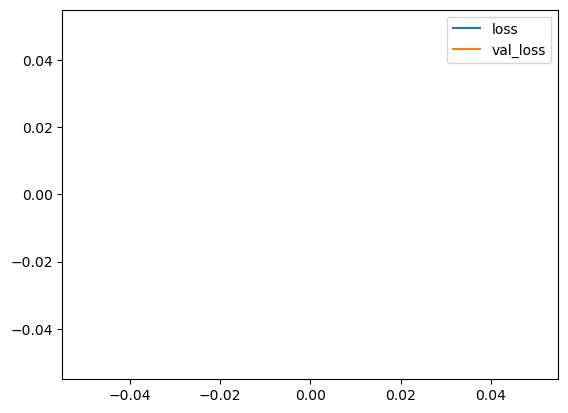

In [29]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early Stopping + Drop Out Layer


In [31]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam',loss='mse')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 55)

Epoch 1/55
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/55
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/55
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/55
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/55
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/55
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/55
200/200 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/55
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/55
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/55
200/200 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/55
200/200 [==============================] - 0s 2

<AxesSubplot:>

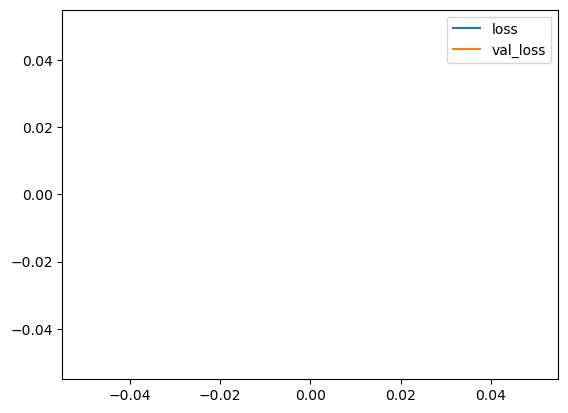

In [32]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

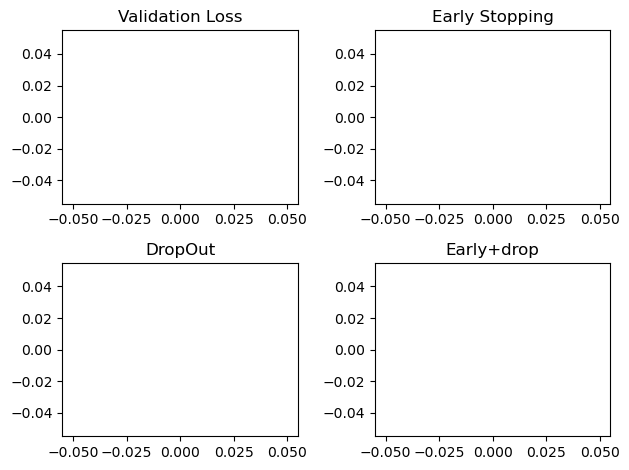

In [33]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()